## Energieversorgung Vertiefung

##### Peter Geyrhofer, 52102155

### Homework 2 - Wirtschaftlichkeit von Kraftwerken

In [3]:
import pandas as pd
import tabulate
import numpy as np
import matplotlib.pyplot as plt

In [4]:
## Zinssätze
p = 0.07
r = 0.02
q = 1 + p
s = 1 + r

## Kennwerte der Kraftwerke
# Braunkohle
a_BK = 1700 # €/kW
c_BK = 95 # €/kWa
n_BK = 20
eta_BK = 0.42 
Hu_BK = 11.0 # MJ/kg
kB_BK = 0.02 # €/kg
d_BK = 0.005 # €/kWh

# GuD
a_GuD = 820 # €/kW
c_GuD = 25 # €/kWa
n_GuD = 20
eta_GuD = 0.578
Hu_GuD = 37.5 # MJ/kg
kB_GuD = 0.215 # €/kg
d_GuD = 0.0023 # €/kWh

# Gasturbine
a_GT = 450 # €/kW
c_GT = 15 # €/kWa
lambda_B = 0.6
lambda_M = 0.4
n_GT_B = 28
n_GT_M = 16
eta_GT = 0.335
Hu_GT = 38 # MJ/kg
kB_GT = 0.205 # €/kg
d_GT = 0.002 # €/kWh

#Fremdbezug
f_FB = 145 # €/kW
v_FB = 0.03 # €/kWh

In [5]:
# Auswertung - Kostencharakteristik
def calculate_alpha(q, s, n):
    return (q - s) / (1 - (s / q) ** n)

def calculate_b(eta, Hu, kB):
    return 1 / eta * 3.6 * 1 / Hu * kB

data = [
    ["Braunkohle",
     alpha_BK := round(calculate_alpha(q, s, n_BK),4),
     alpha_a_BK := round(alpha_BK * a_BK, 2),
     f_BK := round(alpha_BK * a_BK + c_BK, 2),
     b_BK := round(calculate_b(eta_BK, Hu_BK, kB_BK), 4),
     v_BK := round(b_BK + d_BK, 4)],

    ["Kombi-GUD (Erdgas)",
     alpha_GuD := round(calculate_alpha(q, s, n_GuD),4),
     alpha_a_GuD := round(alpha_GuD * a_GuD, 2),
     f_GuD := round(alpha_GuD * a_GuD + c_GuD, 2),
     b_GuD := round(calculate_b(eta_GuD, Hu_GuD, kB_GuD), 4),
     v_GuD := round(b_GuD + d_GuD, 4)],

    ["Gasturbine (Ölgf.)",
     alpha_GT := round(calculate_alpha(q, s, n_GT_B)*lambda_B + calculate_alpha(q, s, n_GT_M)*lambda_M,4),
     alpha_a_GT := round(alpha_GT * a_GT, 2),
     f_GT := round(alpha_GT * a_GT + c_GT, 2),
     b_GT := round(calculate_b(eta_GT, Hu_GT, kB_GT), 4),
     v_GT := round(b_GT + d_GT, 4)],

    ["Fremdbezug", 
     alpha_FB := "-",
     alpha_a_FB :="-",
     f_FB := round(f_FB, 2),
     b_FB := "-",
     v_FB := round(v_FB, 4)]
]

df = pd.DataFrame(data, columns=["Kraftwerkstyp", "α", "α*α", "f = αα + c", "b", "v = b + d"])

table = tabulate.tabulate(df, headers='keys', tablefmt='grid', showindex=False)
print(table)

+--------------------+--------+--------+--------------+--------+-------------+
| Kraftwerkstyp      | α      | α*α    |   f = αα + c | b      |   v = b + d |
+====================+========+========+==============+========+=============+
| Braunkohle         | 0.0812 | 138.04 |       233.04 | 0.0156 |      0.0206 |
+--------------------+--------+--------+--------------+--------+-------------+
| Kombi-GUD (Erdgas) | 0.0812 | 66.58  |        91.58 | 0.0357 |      0.038  |
+--------------------+--------+--------+--------------+--------+-------------+
| Gasturbine (Ölgf.) | 0.078  | 35.1   |        50.1  | 0.058  |      0.06   |
+--------------------+--------+--------+--------------+--------+-------------+
| Fremdbezug         | -      | -      |       145    | -      |      0.03   |
+--------------------+--------+--------+--------------+--------+-------------+


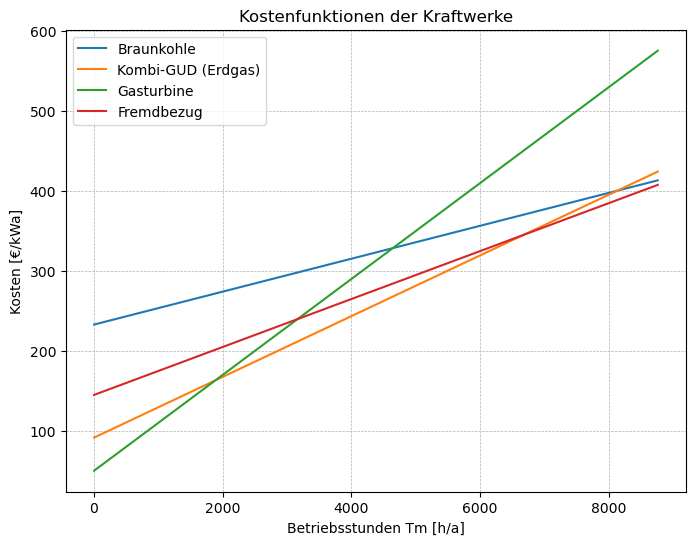

In [6]:
# Auswertung -Kostenfunktionen
Tm = np.linspace(1, 8760, 250)

def k_p(alpha_a, c, b, d, Tm):
    return alpha_a + c + (b + d) * Tm


plt.figure(figsize=(8, 6))
plt.plot(Tm, k_p(alpha_a_BK, c_BK, b_BK, d_BK, Tm), label="Braunkohle")
plt.plot(Tm, k_p(alpha_a_GuD, c_GuD, b_GuD, d_GuD, Tm), label="Kombi-GUD (Erdgas)")
plt.plot(Tm, k_p(alpha_a_GT, c_GT, b_GT, d_GT, Tm), label="Gasturbine")
plt.plot(Tm, k_p(0, f_FB, 0, v_FB, Tm), label="Fremdbezug")
plt.title('Kostenfunktionen der Kraftwerke')
plt.xlabel('Betriebsstunden Tm [h/a]')
plt.ylabel('Kosten [€/kWa]')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()

##### Das Braunkohle-Kraftwerk kommt nicht zum Zug, da die Kostencharakterisitik in keinem Bereiche eine niedrigere Lage gegenüber dem "least-cost"-Polygon hat.

In [8]:
# Kostengleichheitspunkte
T_FB_GuD = (f_FB-f_GuD)/(v_GuD-v_FB)
T_GuD_GT = (f_GuD-f_GT)/(v_GT-v_GuD)


result_data = [
    ["Fremdbezug - GuD", T_FB_GuD],
    ["GuD - Gasturbine", T_GuD_GT]    
]

print(tabulate.tabulate(result_data, headers=["Kraftwerkstyp", "Wert in Stunden"], tablefmt="grid"))

+------------------+-------------------+
| Kraftwerkstyp    |   Wert in Stunden |
+==================+===================+
| Fremdbezug - GuD |           6677.5  |
+------------------+-------------------+
| GuD - Gasturbine |           1885.45 |
+------------------+-------------------+


In [9]:
# Steigung der Dauerlinie
s_1 = (600-400)/(8760-2000)
s_2 = (800-600)/2000

print(round(s_1,4),s_2, "MW/h")

0.0296 0.1 MW/h


In [10]:
# Berechnung Fremdbezug
P_FB = 400 + (8760 - T_FB_GuD)*s_1
E_FB = 400*8760+(P_FB-400)*T_FB_GuD+(P_FB-400)*(8760-T_FB_GuD)/2 
print ("Die berechnete Leistung beträgt:",round(P_FB,2,),"MW.", 
       "Die berechnete Energiemenge beträgt:",round(E_FB,2),"MWh.")

# Wahl Fremdbezug
P_FB_wahl = 465 
print("Die gewählte Leistung beträgt:",round(P_FB_wahl,2),"MW.")

# Berechnung Kosten Fremdbezug
K_FB_fix = P_FB_wahl*f_FB*1/1e3
K_FB_var = E_FB*v_FB*1/1e3
K_FB = K_FB_fix + K_FB_var
K_FB_kWh = ((K_FB*1e3)/E_FB)
print("Kosten für den Fremdbezug betragen:",round(K_FB,2),"Mio € bzw.", round(K_FB_kWh,4),"€/kWh.")

Die berechnete Leistung beträgt: 461.61 MW. Die berechnete Energiemenge beträgt: 3979570.91 MWh.
Die gewählte Leistung beträgt: 465 MW.
Kosten für den Fremdbezug betragen: 186.81 Mio € bzw. 0.0469 €/kWh.


In [11]:
# Berechnung GuD
P_GuD = (T_FB_GuD-2000)*s_1 + (2000-T_GuD_GT)*s_2
E_GuD = (T_FB_GuD-2000)*1/2*(T_FB_GuD-2000)*s_1 + (2000-T_GuD_GT)*1/2*(2000-T_GuD_GT)*s_2
print ("Die berechnete Leistung beträgt:",round(P_GuD,2,),"MW.",
       "Die berechnete Energiemenge beträgt:",round(E_GuD,2),"MWh.")

# Wahl GuD
P_GuD_wahl = 150 
print("Die gewählte Leistung beträgt:",round(P_GuD_wahl,2),"MW.")

# Berechnung Kosten GuD
K_GuD_fix = P_GuD_wahl*f_GuD*1/1e3
K_GuD_var = E_GuD*v_GuD*1/1e3
K_GuD = K_GuD_fix + K_GuD_var
K_GuD_kWh = ((K_GuD*1e3)/E_GuD)
print("Kosten für das GuD-Kraftwerk betragen:",round(K_GuD,2),"Mio € bzw.", round(K_GuD_kWh,4),"€/kWh.")

Die berechnete Leistung beträgt: 149.84 MW. Die berechnete Energiemenge beträgt: 324309.97 MWh.
Die gewählte Leistung beträgt: 150 MW.
Kosten für das GuD-Kraftwerk betragen: 26.06 Mio € bzw. 0.0804 €/kWh.


In [12]:
# Berechnung Gasturbine
P_GT = T_GuD_GT*s_2
E_GT = T_GuD_GT*1/2*P_GT
print ("Die berechnete Leistung beträgt:",round(P_GT,2,),"MW.", 
       "Die berechnete Energiemenge beträgt:",round(E_GT,2),"MWh.")

# Wahl Gasturbine
P_GT_wahl = 210 
print("Die gewählte Leistung inkl. 10% Leistungsreserve beträgt:",round(P_GT_wahl,2),"MW.")

# Berechnung Kosten Gasturbine
K_GT_fix = P_GT_wahl*f_GT*1/1e3
K_GT_var = E_GT*v_GT*1/1e3
K_GT = K_GT_fix+K_GT_var
K_GT_kWh = ((K_GT*1e3)/E_GT)
print("Kosten für das Gasturbinen-Kraftwerk betragen:",round(K_GT,2),"Mio € bzw.", round(K_GT_kWh,4),"€/kWh.")

Die berechnete Leistung beträgt: 188.55 MW. Die berechnete Energiemenge beträgt: 177746.94 MWh.
Die gewählte Leistung inkl. 10% Leistungsreserve beträgt: 210 MW.
Kosten für das Gasturbinen-Kraftwerk betragen: 21.19 Mio € bzw. 0.1192 €/kWh.


In [13]:
data = {
    "Fremdbezug": [
        round(P_FB, 2), 
        round(P_FB_wahl, 2), 
        round(E_FB / 1e3, 2), 
        round(K_FB_fix, 2), 
        round(K_FB_var, 2), 
        round(K_FB, 2), 
        round(K_FB_kWh, 4)
    ],
    "GuD": [
        round(P_GuD, 2), 
        round(P_GuD_wahl, 2), 
        round(E_GuD / 1e3, 2), 
        round(K_GuD_fix, 2), 
        round(K_GuD_var, 2), 
        round(K_GuD, 2), 
        round(K_GuD_kWh, 4)
    ],
    "Gasturbine": [
        round(P_GT, 2), 
        round(P_GT_wahl, 2), 
        round(E_GT / 1e3, 2), 
        round(K_GT_fix, 2), 
        round(K_GT_var, 2), 
        round(K_GT, 2), 
        round(K_GT_kWh, 4)
    ]
}
df = pd.DataFrame(data, index=[
    "Leistung [MW]",
    "Leistung gewählt [MW]",
    "Energie [GWh]",
    "Fixkosten [Mio €]",
    "Variable Kosten [Mio €]",
    "Gesamtkosten [Mio €]",
    "Kosten [€/kWh]"
])
print(tabulate.tabulate(df, headers='keys', tablefmt='grid', showindex=True))
print("Die Gesamtkosten des Energiesystemes inkl. 10% Leistungsreserve betragen:",round(K_FB+K_GuD+K_GT,2),"Mio €")

+-------------------------+--------------+----------+--------------+
|                         |   Fremdbezug |      GuD |   Gasturbine |
+=========================+==============+==========+==============+
| Leistung [MW]           |     461.61   | 149.84   |     188.55   |
+-------------------------+--------------+----------+--------------+
| Leistung gewählt [MW]   |     465      | 150      |     210      |
+-------------------------+--------------+----------+--------------+
| Energie [GWh]           |    3979.57   | 324.31   |     177.75   |
+-------------------------+--------------+----------+--------------+
| Fixkosten [Mio €]       |      67.42   |  13.74   |      10.52   |
+-------------------------+--------------+----------+--------------+
| Variable Kosten [Mio €] |     119.39   |  12.32   |      10.66   |
+-------------------------+--------------+----------+--------------+
| Gesamtkosten [Mio €]    |     186.81   |  26.06   |      21.19   |
+-------------------------+-------

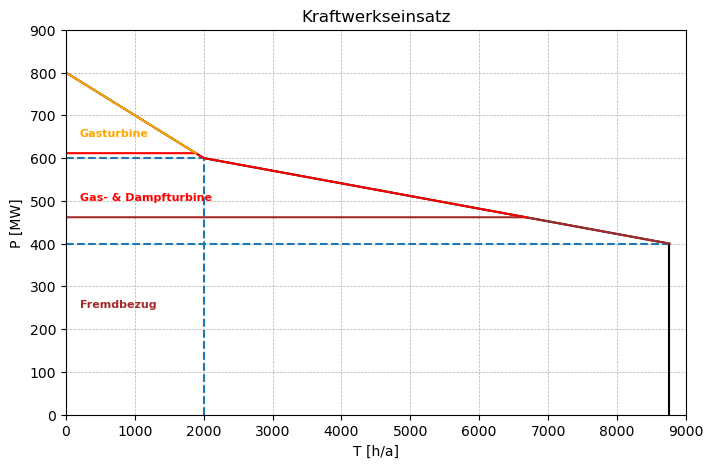

In [14]:
# Darstellung Kraftwerkseinsatz
x = [0, 2000, 8760]  
y = [800, 600, 400] 
plt.figure(figsize=(8, 5))
plt.plot(x, y, '-k')

plt.hlines(600, 0, 2000, linestyles='dashed')
plt.hlines(400, 0, 8760, linestyles='dashed')
plt.vlines(2000, 0, 600, linestyles='dashed')
plt.vlines(8760, 0, 400, color='black')

plt.plot([0, T_FB_GuD, 8760], [P_FB, P_FB, 400], color='brown')
plt.plot([0, T_GuD_GT, 2000], [P_GuD+P_FB, P_GuD+P_FB, 600], color='red')
plt.plot([2000, 2000 , T_FB_GuD], [600, 600, P_FB], color='red')
plt.plot([0, 0, T_GuD_GT], [P_FB+P_GuD+P_GT, P_FB+P_GuD+P_GT, P_FB+P_GuD], color='orange')

plt.text(200, 250, "Fremdbezug", fontsize=8, color='brown',fontweight='bold')
plt.text(200, 500, "Gas- & Dampfturbine", fontsize=8, color='red',fontweight='bold')
plt.text(200, 650, "Gasturbine", fontsize=8, color='orange',fontweight='bold')

plt.title("Kraftwerkseinsatz")
plt.xlabel("T [h/a]")
plt.ylabel("P [MW]")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.xlim(0, 9000)
plt.ylim(0, 900)

plt.show()

### Zusatzüberlegung - Abschreibungsdauer GuD = 10 Jahre

In [16]:
n_GuD_neu = 10

In [17]:
# Auswertung - Kostencharakteristik
def calculate_alpha(q, s, n):
    return (q - s) / (1 - (s / q) ** n)

def calculate_b(eta, Hu, kB):
    return 1 / eta * 3.6 * 1 / Hu * kB

data = [
    ["Braunkohle",
     alpha_BK := round(calculate_alpha(q, s, n_BK),4),
     alpha_a_BK := round(alpha_BK * a_BK, 2),
     f_BK := round(alpha_BK * a_BK + c_BK, 2),
     b_BK := round(calculate_b(eta_BK, Hu_BK, kB_BK), 4),
     v_BK := round(b_BK + d_BK, 4)],

    ["Kombi-GUD (Erdgas)",
     alpha_GuD_neu := round(calculate_alpha(q, s, n_GuD_neu),4),
     alpha_a_GuD_neu := round(alpha_GuD_neu * a_GuD, 2),
     f_GuD_neu := round(alpha_GuD_neu * a_GuD + c_GuD, 2),
     b_GuD_neu := round(calculate_b(eta_GuD, Hu_GuD, kB_GuD), 4),
     v_GuD_neu := round(b_GuD + d_GuD, 4)],

    ["Gasturbine (Ölgf.)",
     alpha_GT := round(calculate_alpha(q, s, n_GT_B)*lambda_B + calculate_alpha(q, s, n_GT_M)*lambda_M,4),
     alpha_a_GT := round(alpha_GT * a_GT, 2),
     f_GT := round(alpha_GT * a_GT + c_GT, 2),
     b_GT := round(calculate_b(eta_GT, Hu_GT, kB_GT), 4),
     v_GT := round(b_GT + d_GT, 4)],

    ["Fremdbezug", "-", "-", round(f_FB, 2), "-", round(v_FB, 4)]
]

df = pd.DataFrame(data, columns=["Kraftwerkstyp", "α", "α*α", "f = αα + c", "b", "v = b + d"])

table = tabulate.tabulate(df, headers='keys', tablefmt='grid', showindex=False)
print(table)

+--------------------+--------+--------+--------------+--------+-------------+
| Kraftwerkstyp      | α      | α*α    |   f = αα + c | b      |   v = b + d |
+====================+========+========+==============+========+=============+
| Braunkohle         | 0.0812 | 138.04 |       233.04 | 0.0156 |      0.0206 |
+--------------------+--------+--------+--------------+--------+-------------+
| Kombi-GUD (Erdgas) | 0.1315 | 107.83 |       132.83 | 0.0357 |      0.038  |
+--------------------+--------+--------+--------------+--------+-------------+
| Gasturbine (Ölgf.) | 0.078  | 35.1   |        50.1  | 0.058  |      0.06   |
+--------------------+--------+--------+--------------+--------+-------------+
| Fremdbezug         | -      | -      |       145    | -      |      0.03   |
+--------------------+--------+--------+--------------+--------+-------------+


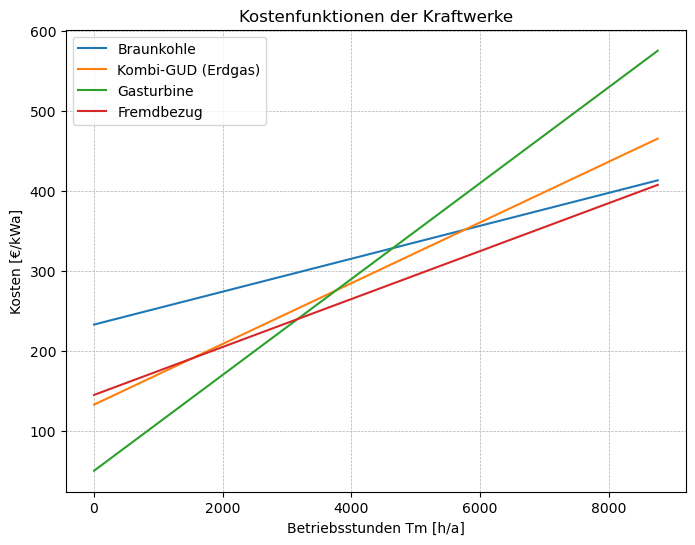

In [18]:
# Auswertung -Kostenfunktionen
Tm = np.linspace(1, 8760, 250)

def k_p(alpha_a, c, b, d, Tm):
    return alpha_a + c + (b + d) * Tm


plt.figure(figsize=(8, 6))
plt.plot(Tm, k_p(alpha_a_BK, c_BK, b_BK, d_BK, Tm), label="Braunkohle")
plt.plot(Tm, k_p(alpha_a_GuD_neu, c_GuD, b_GuD, d_GuD, Tm), label="Kombi-GUD (Erdgas)")
plt.plot(Tm, k_p(alpha_a_GT, c_GT, b_GT, d_GT, Tm), label="Gasturbine")
plt.plot(Tm, k_p(0, f_FB, 0, v_FB, Tm), label="Fremdbezug")
plt.title('Kostenfunktionen der Kraftwerke')
plt.xlabel('Betriebsstunden Tm [h/a]')
plt.ylabel('Kosten [€/kWa]')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()

#### Erkennbar ist, dass durch die Änderung der Abschreibungsdauer das GuD-Kraftwerk vollkommen aus dem least-cost Polygon fällt. Somit kommt es nicht zum Zug. In der weiteren Berechnung wurden somit nur die Fixkosten für die Errichtung der im 1. Punkt ermittelten Kraftwerksleistung berücksichtigt.

In [20]:
# Kostengleichheitspunkte
T_FB_GuD_neu = (f_FB-f_GuD_neu)/(v_GuD_neu-v_FB)
T_GuD_GT_neu = (f_GuD_neu-f_GT)/(v_GT-v_GuD_neu)
T_FB_GT = (f_FB-f_GT)/(v_GT-v_FB)

result_data = [
    ["Fremdbezug - GuD", T_FB_GuD_neu],
    ["GuD - Gasturbine", T_GuD_GT_neu],
    ["Fremdbezug - Gasturbine", T_FB_GT]
]
print(tabulate.tabulate(result_data, headers=["Kraftwerkstyp", "Wert in Stunden"], tablefmt="grid"))

+-------------------------+-------------------+
| Kraftwerkstyp           |   Wert in Stunden |
+=========================+===================+
| Fremdbezug - GuD        |           1521.25 |
+-------------------------+-------------------+
| GuD - Gasturbine        |           3760.45 |
+-------------------------+-------------------+
| Fremdbezug - Gasturbine |           3163.33 |
+-------------------------+-------------------+


In [21]:
# Berechnung Fremdbezug
P_FB_neu = 400 + (8760 - T_FB_GT)*s_1
E_FB_neu = 400*8760+(P_FB_neu-400)*T_FB_GT+(P_FB_neu-400)*(8760-T_FB_GT)/2 
print ("Die berechnete Leistung beträgt:",round(P_FB_neu,2,),"MW.",
       "Die berechnete Energiemenge beträgt:",round(E_FB_neu,2),"MWh.")

# Wahl Fremdbezug
P_FB_wahl_neu = 570 
print("Die gewählte Leistung beträgt:",round(P_FB_wahl_neu,2),"MW.")

# Berechnung Kosten Fremdbezug
K_FB_fix_neu = P_FB_wahl_neu*f_FB*1/1e3
K_FB_var_neu = E_FB_neu*v_FB*1/1e3
K_FB_neu = K_FB_fix_neu + K_FB_var_neu
K_FB_kWh_neu = ((K_FB_neu*1e3)/E_FB_neu)
print("Kosten für den Fremdbezug betragen:",round(K_FB_neu,2),"Mio € bzw.", round(K_FB_kWh_neu,4),"€/kWh.")

Die berechnete Leistung beträgt: 565.58 MW. Die berechnete Energiemenge beträgt: 4491143.82 MWh.
Die gewählte Leistung beträgt: 570 MW.
Kosten für den Fremdbezug betragen: 217.38 Mio € bzw. 0.0484 €/kWh.


In [22]:
# Berechnung Gasturbine
P_GT_neu = 800-P_FB_neu
E_GT_neu = 2000*200/2+(600-P_FB_neu)*2000+(600-P_FB_neu)*(T_FB_GT-2000)
print ("Die berechnete Leistung beträgt:",round(P_GT_neu,2,),"MW.",
       "Die berechnete Energiemenge beträgt:",round(E_GT_neu,2),"MWh.")

# Wahl Gasturbine
P_GT_wahl_neu = 260
print("Die gewählte Leistung inkl. 10% Leistungsreserve beträgt:",round(P_GT_wahl_neu,2),"MW.")

# Berechnung Kosten Gasturbine
K_GT_fix_neu = P_GT_wahl_neu*f_GT*1/1e3
K_GT_var_neu = E_GT_neu*v_GT*1/1e3
K_GT_neu = K_GT_fix_neu+K_GT_var_neu
K_GT_kWh_neu = ((K_GT*1e3)/E_GT_neu)
print("Kosten für das Gasturbinen-Kraftwerk betragen:",round(K_GT_neu,2),"Mio € bzw.", round(K_GT_kWh_neu,4),"€/kWh.")

Die berechnete Leistung beträgt: 234.42 MW. Die berechnete Energiemenge beträgt: 308876.07 MWh.
Die gewählte Leistung inkl. 10% Leistungsreserve beträgt: 260 MW.
Kosten für das Gasturbinen-Kraftwerk betragen: 31.56 Mio € bzw. 0.0686 €/kWh.


In [23]:
# Berechnung GuD
E_GuD_neu = 0
P_GuD_wahl = 150 
print("Die gewählte Leistung lt. Punkt 1 beträgt:",round(P_GuD_wahl,2),"MW.",
      "Die berechnete Energiemenge beträgt:",E_GuD_neu, "MWh.")

# Berechnung Kosten GuD
K_GuD_fix_neu = P_GuD_wahl*f_GuD_neu*1/1e3
K_GuD_var_neu = E_GuD_neu*v_GuD*1/1e3
K_GuD_neu = K_GuD_fix_neu + K_GuD_var_neu
K_GuD_kWh_neu = ((K_GuD*1e3)/E_GuD)
print("Die Kosten für das GuD-Kraftwerk mit neuer Abschreibungsdauer betragen:",round(K_GuD_neu,2),"Mio €", "bzw.",round(K_GuD_kWh_neu,4),"€/kWh.")

Die gewählte Leistung lt. Punkt 1 beträgt: 150 MW. Die berechnete Energiemenge beträgt: 0 MWh.
Die Kosten für das GuD-Kraftwerk mit neuer Abschreibungsdauer betragen: 19.92 Mio € bzw. 0.0804 €/kWh.


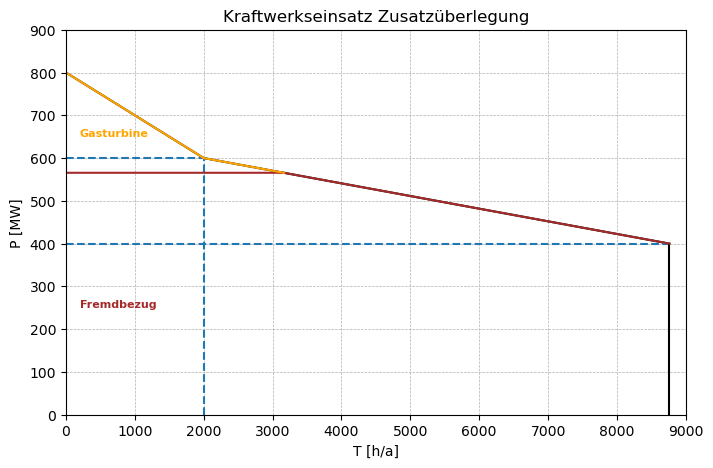

In [24]:
# Darstellung Kraftwerkseinsatz
x = [0, 2000, 8760]  
y = [800, 600, 400] 
plt.figure(figsize=(8, 5))
plt.plot(x, y, '-k')

plt.hlines(600, 0, 2000, linestyles='dashed')
plt.hlines(400, 0, 8760, linestyles='dashed')
plt.vlines(2000, 0, 600, linestyles='dashed')
plt.vlines(8760, 0, 400, color='black')

plt.plot([0, T_FB_GT, 8760], [P_FB_neu, P_FB_neu, 400], color='brown')
plt.plot([0, 0, 2000], [800, 800, 600], color='orange')
plt.plot([2000, 2000 , T_FB_GT], [600, 600, P_FB_neu], color='orange')

plt.text(200, 250, "Fremdbezug", fontsize=8, color='brown',fontweight='bold')
plt.text(200, 650, "Gasturbine", fontsize=8, color='orange',fontweight='bold')

plt.title("Kraftwerkseinsatz Zusatzüberlegung")
plt.xlabel("T [h/a]")
plt.ylabel("P [MW]")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.xlim(0, 9000)
plt.ylim(0, 900)

plt.show()

In [25]:
data = {
    "Fremdbezug_neu": [
        round(P_FB_neu, 2), 
        round(P_FB_wahl_neu, 2), 
        round(E_FB_neu / 1e3, 2), 
        round(K_FB_fix_neu, 2), 
        round(K_FB_var_neu, 2), 
        round(K_FB_neu, 2), 
        round(K_FB_kWh_neu, 4)
    ],
    "GuD_neu": [
        round(0, 2), 
        round(P_GuD_wahl, 2), 
        round(E_GuD_neu / 1e3, 2), 
        round(K_GuD_fix_neu, 2), 
        round(K_GuD_var_neu, 2), 
        round(K_GuD_neu, 2), 
        round(K_GuD_kWh_neu, 4)
    ],
    "Gasturbine_neu": [
        round(P_GT_neu, 2), 
        round(P_GT_wahl_neu, 2), 
        round(E_GT_neu / 1e3, 2), 
        round(K_GT_fix_neu, 2), 
        round(K_GT_var_neu, 2), 
        round(K_GT_neu, 2), 
        round(K_GT_kWh_neu, 4)
    ]
}

# Erstellen des DataFrame mit den Kraftwerken als Spaltenüberschrift
df = pd.DataFrame(data, index=[
    "Leistung berechnet [MW]",
    "Leistung gewählt [MW]",
    "Energie [GWh]",
    "Fixkosten [Mio €]",
    "Variable Kosten [Mio €]",
    "Gesamtkosten [Mio €]",
    "Kosten [€/kWh]"
])

# Ausgabe als formatierte Tabelle
print(tabulate.tabulate(df, headers='keys', tablefmt='grid', showindex=True))
print("Für die Zusatzüberlegung betragen die  Gesamtkosten des Energiesystemes inkl. 10% Leistungsreserve:",round(K_FB_neu+K_GuD_neu+K_GT_neu,2),"Mio €")

+-------------------------+------------------+-----------+------------------+
|                         |   Fremdbezug_neu |   GuD_neu |   Gasturbine_neu |
+=========================+==================+===========+==================+
| Leistung berechnet [MW] |         565.58   |    0      |         234.42   |
+-------------------------+------------------+-----------+------------------+
| Leistung gewählt [MW]   |         570      |  150      |         260      |
+-------------------------+------------------+-----------+------------------+
| Energie [GWh]           |        4491.14   |    0      |         308.88   |
+-------------------------+------------------+-----------+------------------+
| Fixkosten [Mio €]       |          82.65   |   19.92   |          13.03   |
+-------------------------+------------------+-----------+------------------+
| Variable Kosten [Mio €] |         134.73   |    0      |          18.53   |
+-------------------------+------------------+-----------+------